In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


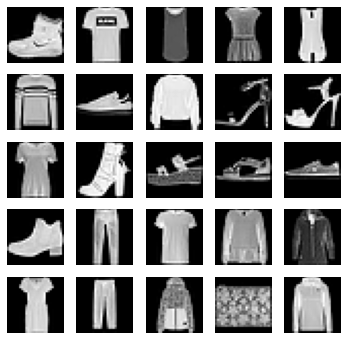

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.axis('off')

plt.show()

In [3]:
import numpy as np

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_tetst = x_test.astype(np.float32) / 255.0

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

cnn = Sequential()

cnn.add(Conv2D(input_shape=(28,28,1), 
               kernel_size=(3,3), filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

training = cnn.fit(x_train, y_train, batch_size=128, epochs=30, 
                   validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 37s 16ms/step - loss: 0.5143 - accuracy: 0.8180 - val_loss: 34.4924 - val_accuracy: 0.8648
Epoch 2/30
469/469 [==============================] - 7s 15ms/step - loss: 0.3342 - accuracy: 0.8801 - val_loss: 29.8251 - val_accuracy: 0.8780
Epoch 3/30
469/469 [==============================] - 7s 15ms/step - loss: 0.2855 - accuracy: 0.8964 - val_loss: 23.0104 - val_accuracy: 0.8958
Epoch 4/30
469/469 [==============================] - 7s 15ms/step - loss: 0.2554 - accuracy: 0.9071 - val_loss: 31.8381 - val_accuracy: 0.8703
Epoch 5/30
469/469 [==============================] - 7s 15ms/step - loss: 0.2308 - accuracy: 0.9158 - val_loss: 32.2586 - val_accuracy: 0.8752
Epoch 6/30
469/469 [==============================] - 7s 15ms/step - loss: 0.2154 - accuracy: 0.9210 - val_loss: 30.5414 - val_accuracy: 0.8710
Epoch 7/30
469/469 [==============================] - 8s 18ms/step - loss: 0.1959 - accuracy: 0.9281 - val_loss: 44.4567 - val_accuracy

In [5]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 127.8854 - accuracy: 0.8607


[127.8853759765625, 0.8607000112533569]

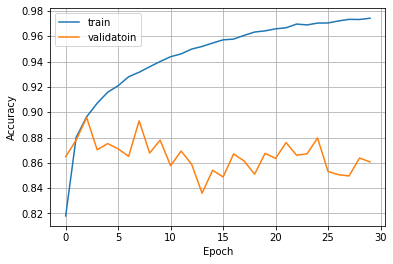

In [6]:
import matplotlib.pyplot as plt

plt.plot(training.history['accuracy'], label='train')
plt.plot(training.history['val_accuracy'], label='validatoin')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

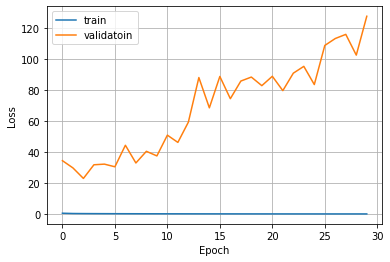

In [7]:
plt.plot(training.history['loss'], label='train')
plt.plot(training.history['val_loss'], label='validatoin')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

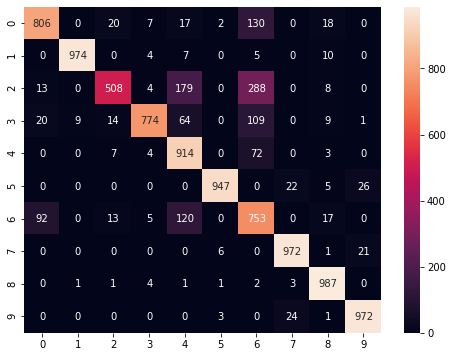

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(8,6))

p = cnn.predict(x_test)
c = confusion_matrix(y_test, np.argmax(p, axis=1))

sns.heatmap(c, annot=True, fmt='d')
plt.show()

In [9]:
print(c)
print('\n')

for i in range(10):
  print(('%d\t (%d/%d)\taccuracy = %.3f') % (i, np.max(c[i]), np.sum(c[i]), np.max(c[i])/np.sum(c[i])))

[[806   0  20   7  17   2 130   0  18   0]
 [  0 974   0   4   7   0   5   0  10   0]
 [ 13   0 508   4 179   0 288   0   8   0]
 [ 20   9  14 774  64   0 109   0   9   1]
 [  0   0   7   4 914   0  72   0   3   0]
 [  0   0   0   0   0 947   0  22   5  26]
 [ 92   0  13   5 120   0 753   0  17   0]
 [  0   0   0   0   0   6   0 972   1  21]
 [  0   1   1   4   1   1   2   3 987   0]
 [  0   0   0   0   0   3   0  24   1 972]]


0	 (806/1000)	accuracy = 0.806
1	 (974/1000)	accuracy = 0.974
2	 (508/1000)	accuracy = 0.508
3	 (774/1000)	accuracy = 0.774
4	 (914/1000)	accuracy = 0.914
5	 (947/1000)	accuracy = 0.947
6	 (753/1000)	accuracy = 0.753
7	 (972/1000)	accuracy = 0.972
8	 (987/1000)	accuracy = 0.987
9	 (972/1000)	accuracy = 0.972
